In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import math
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, StackingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import make_scorer
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from regressors import stats
from scipy.stats import kurtosis, skew, boxcox
from sklearn.kernel_ridge import KernelRidge

In [2]:
train = pd.read_csv('train.csv',index_col='Id')
test = pd.read_csv('test.csv',index_col='Id')

# Missing Values

In [3]:
na_counts_train = train.isnull().sum()
na_counts_train[na_counts_train != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [4]:
na_counts_test = test.isnull().sum()
na_counts_test[na_counts_test != 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        16
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [5]:
class DataCleaner:
    
    def __init__(self, train, test):
        self.train = train.copy()
        self.test = test.copy()
        
    
    def cleanAlley(self):
        self.train.loc[:,'Alley'] = self.train['Alley'].fillna('No_Alley_Access')
        self.test.loc[:,'Alley'] = self.test['Alley'].fillna('No_Alley_Access')
    
    
    def cleanBsmt(self):
        self.cleanBsmtQual()
        self.cleanBsmtCond()
        self.cleanBsmtExposure()
        self.cleanBsmtFinType1()
        self.cleanBsmtFinType2()
        self.cleanBsmtFinSF1()
        self.cleanBsmtFinSF2()
        self.cleanBsmtUnfSF()
        self.cleanTotalBsmtSF()
        self.cleanBsmtFullBath()
        self.cleanBsmtHalfBath()
    
    def cleanBsmtQual(self):
        self.train.loc[:,'BsmtQual'] = self.train['BsmtQual'].fillna('No_Basement')
        self.test.loc[:,'BsmtQual'] = self.test['BsmtQual'].fillna('No_Basement')
        
        
    def cleanBsmtCond(self):
        self.train.loc[:,'BsmtCond'] = self.train['BsmtCond'].fillna('No_Basement')
        self.test.loc[:,'BsmtCond'] = self.test['BsmtCond'].fillna('No_Basement')
        
    
    def cleanBsmtExposure(self):
        self.train.loc[:,'BsmtExposure'] = self.train['BsmtExposure'].fillna('No_Basement')
        self.test.loc[:,'BsmtExposure'] = self.test['BsmtExposure'].fillna('No_Basement')
        
        
    def cleanBsmtFinType1(self):
        self.train.loc[:,'BsmtFinType1'] = self.train['BsmtFinType1'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType1'] = self.test['BsmtFinType1'].fillna('No_Basement')

        
    def cleanBsmtFinType2(self):
        self.train.loc[:,'BsmtFinType2'] = self.train['BsmtFinType2'].fillna('No_Basement')
        self.test.loc[:,'BsmtFinType2'] = self.test['BsmtFinType2'].fillna('No_Basement')
        
        
    def cleanBsmtFinSF1(self):

        self.train.loc[:,'BsmtFinSF1'] = self.train['BsmtFinSF1'].fillna(0)
        self.test.loc[:,'BsmtFinSF1'] = self.test['BsmtFinSF1'].fillna(0)

        
    def cleanBsmtFinSF2(self):
        self.train.loc[:,'BsmtFinSF2'] = self.train['BsmtFinSF2'].fillna(0)
        self.test.loc[:,'BsmtFinSF2'] = self.test['BsmtFinSF2'].fillna(0)
        

    def cleanBsmtUnfSF(self):
        self.train.loc[:,'BsmtUnfSF'] = self.train['BsmtUnfSF'].fillna(0)
        self.test.loc[:,'BsmtUnfSF'] = self.test['BsmtUnfSF'].fillna(0)
        
        
    def cleanTotalBsmtSF(self):
        self.train.loc[:,'TotalBsmtSF'] = self.train['TotalBsmtSF'].fillna(0)   
        self.test.loc[:,'TotalBsmtSF'] = self.test['TotalBsmtSF'].fillna(0)
        
        
    def cleanBsmtFullBath(self):
        self.train.loc[:,'BsmtFullBath'] = self.train['BsmtFullBath'].fillna(0)
        self.test.loc[:,'BsmtFullBath'] = self.test['BsmtFullBath'].fillna(0)
        
    def cleanBsmtHalfBath(self):
        self.train.loc[:,'BsmtHalfBath'] = self.train['BsmtHalfBath'].fillna(0)
        self.test.loc[:,'BsmtHalfBath'] = self.test['BsmtHalfBath'].fillna(0)
    
    
    def cleanFireplaceQu(self):
        self.train.loc[:,'FireplaceQu'] = self.train['FireplaceQu'].fillna('No_Fireplace')
        self.test.loc[:,'FireplaceQu'] = self.test['FireplaceQu'].fillna('No_Fireplace')
    
    
    def cleanGarage(self):
        self.cleanGarageType()
        self.cleanGarageYrBlt()
        self.cleanGarageFinish()
        self.cleanGarageQual()
        self.cleanGarageCond()
        self.cleanGarageCars()
        self.cleanGarageArea()
        
        
    def cleanGarageType(self):
        self.train.loc[:,'GarageType'] = self.train['GarageType'].fillna('No_Garage')
        self.test.loc[:,'GarageType'] = self.test['GarageType'].fillna('No_Garage')
        
        
    def cleanGarageYrBlt(self):
        self.train.loc[:,'GarageYrBlt'] = self.train['GarageYrBlt'].fillna(0)
        self.test.loc[:,'GarageYrBlt'] = self.test['GarageYrBlt'].fillna(0)

        
    def cleanGarageFinish(self):
        self.train.loc[:,'GarageFinish'] = self.train['GarageFinish'].fillna('No_Garage')
        self.test.loc[:,'GarageFinish'] = self.test['GarageFinish'].fillna('No_Garage')
        
        
    def cleanGarageQual(self):
        self.train.loc[:,'GarageQual'] = self.train['GarageQual'].fillna('No_Garage')        
        self.test.loc[:,'GarageQual'] = self.test['GarageQual'].fillna('No_Garage')
        
          
    def cleanGarageCond(self):
        self.train.loc[:,'GarageCond'] = self.train['GarageCond'].fillna('No_Garage')        
        self.test.loc[:,'GarageCond'] = self.test['GarageCond'].fillna('No_Garage')
        
        
    def cleanGarageCars(self):
        self.train.loc[:,'GarageCars'] = self.train['GarageCars'].fillna(0)        
        self.test.loc[:,'GarageCars'] = self.test['GarageCars'].fillna(0)
        
        
        
    def cleanGarageArea(self):
        self.train.loc[:,'GarageArea'] = self.train['GarageArea'].fillna(0)        
        self.test.loc[:,'GarageArea'] = self.test['GarageArea'].fillna(0)
        
        
    def cleanPoolQC(self):
        self.train.loc[:,'PoolQC'] = self.train['PoolQC'].fillna('No_Pool')
        self.test.loc[:,'PoolQC'] = self.test['PoolQC'].fillna('No_Pool')
    
    
    def cleanFence(self):
        self.train.loc[:,'Fence'] = self.train['Fence'].fillna('No_Fence')
        self.test.loc[:,'Fence'] = self.test['Fence'].fillna('No_Fence')

    
    def cleanMiscFeature(self):
        self.train.loc[:,'MiscFeature'] = self.train['MiscFeature'].fillna('No_Misc_Feature')
        self.test.loc[:,'MiscFeature'] = self.test['MiscFeature'].fillna('No_Misc_Feature')
        
        
    def cleanMasVnrType(self):
        #self.imputeColumn('MasVnrType')
        self.train.loc[:,'MasVnrType'] = self.train['MasVnrType'].fillna('No_MasVnr')
        self.test.loc[:,'MasVnrType'] = self.test['MasVnrType'].fillna('No_MasVnr')

        
    
    def cleanMasVnrArea(self):
        #self.imputeColumn('MasVnrArea')
        self.train.loc[:,'MasVnrArea'] = self.train['MasVnrArea'].fillna(0)
        self.test.loc[:,'MasVnrArea'] = self.test['MasVnrArea'].fillna(0)
        
        
    def cleanMSSubClass(self):
        self.train.loc[:,'MSSubClass'] = self.train['MSSubClass'].astype('object')
        self.test.loc[:,'MSSubClass'] = self.test['MSSubClass'].astype('object')


    
    def cleanLotFrontage(self):
         self.imputeColumn('LotFrontage')
        
        
    def cleanElectrical(self):
        self.imputeColumn('Electrical')
        
        
    def cleanMSZoning(self):
        self.imputeColumn('MSZoning')
        
    def cleanUtilities(self):
        self.imputeColumn('Utilities')
        
        
    def cleanExterior1st(self):
        self.imputeColumn('Exterior1st')
        
    def cleanExterior2nd(self):
        self.imputeColumn('Exterior2nd')
        
    def cleanKitchenQual(self):
        self.imputeColumn('KitchenQual')
        
        
    def cleanFunctional(self):
        self.imputeColumn('Functional')
        
        
    def cleanSaleType(self):
        self.imputeColumn('SaleType')
        
        
    def imputeColumn(self, colName):
        train, test = self.dummify([colName])
        missing_train = train[train[colName].isnull()]
        train_na = train[train[colName].notnull()]
        missing_test = test[test[colName].isnull()]
        
        isMissingFeatureCol_Train = sum(missing_train.columns[missing_train.isnull().sum() != 0] != colName) == 0
        isMissingFeatureCol_Test = sum(missing_test.columns[missing_test.isnull().sum() != 0] != colName) == 0

        if (isMissingFeatureCol_Train) & (isMissingFeatureCol_Test):
            print('Dropping Rows')
            train_na = train[train[colName].notnull()]
            train_na = train_na.dropna()
            train_na_X = train_na.loc[:,train_na.columns.difference([colName,'SalePrice'])]
            train_na_y = train_na[colName]
            
            missing_train = missing_train.loc[:,missing_train.columns.difference([colName, 'SalePrice'])]
            missing_test = missing_test.loc[:,missing_test.columns.difference([colName, 'SalePrice'])]
             
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
                
            
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed  
        else:
            print('DroppingCols')
            colsWithNA = train_na.columns[train_na.isnull().sum() != 0].to_list()
            colsWithNA_Missing = missing_train.columns[missing_train.isnull().sum() != 0].to_list()
            targetCols = [colName,'SalePrice']
            colsToDrop = targetCols + colsWithNA + colsWithNA_Missing

            train_na_X = train_na.loc[:,train_na.columns.difference(colsToDrop)]
            train_na_y = train_na[colName]

            missing_train = missing_train.loc[:,missing_train.columns.difference(colsToDrop)]
            missing_test = missing_test.loc[:,missing_test.columns.difference(colsToDrop)]
            
            rf = self.randomForestImputation(train_na_X, train_na_y, train[colName].dtypes, 2)
        
            if len(missing_train) != 0:
                imputed = rf.predict(missing_train)
                m = self.train[colName].isnull()
                self.train.loc[m, colName] = imputed
                
            if len(missing_test) != 0:
                imputed = rf.predict(missing_test)
                m = self.test[colName].isnull()
                self.test.loc[m, colName] = imputed
                
    def randomForestImputation(self, train_X, train_y, forestType, cv):
        
        if forestType == 'object':
            rf = RandomForestClassifier()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(confusion_matrix(predictions, y_test))
            print(accuracy_score(predictions, y_test))
            print(precision_score(predictions, y_test, average='weighted'))
            
        else:
            rf = RandomForestRegressor()
            X_train, X_test, y_train, y_test = train_test_split(train_X, train_y, test_size=0.20, random_state=42)
            rf.fit(X_train, y_train)
            predictions = rf.predict(X_test)
            print(pd.DataFrame(predictions,y_test))
            print(mean_squared_error(predictions, y_test))
        
        return rf
            
    '''
    def cleanAllColumns(self):
        self.cleanAlley()
        self.cleanBsmt()
        self.cleanElectrical()
        self.cleanFence()
        self.cleanFireplaceQu()
        self.cleanGarage()
        self.cleanMasVnrArea()
        self.cleanMasVnrType()
        self.cleanMiscFeature()
        self.cleanPoolQC()
        self.cleanMSZoning()
        self.cleanUtilities()
        self.cleanExterior1st()
        self.cleanExterior2nd()
        self.cleanKitchenQual()
        self.cleanFunctional()
        self.cleanSaleType()   
    '''

        
    def dummify(self, notCols):
        cat_cols = self.train.dtypes[self.train.dtypes == 'object'].index.to_list()
        
        try:
            for col in notCols:
                cat_cols.remove(col)
        except:
            print('Column not in category cols')
        
        dum_train = pd.DataFrame()
        dum_test = pd.DataFrame()
        dummies_train = []
        dummies_test = []
        for col in cat_cols:
            dum_train = pd.get_dummies(self.train[col], prefix=f'{col}Dummy', drop_first=True)
            dum_test = pd.get_dummies(self.test[col], prefix= f'{col}Dummy', drop_first=True)
            dummies_train.append(dum_train)
            dummies_test.append(dum_test)
            
        
        concat_dummies_train = pd.concat(dummies_train, axis=1)
        train = pd.concat([self.train, concat_dummies_train], axis=1)
        train = train.drop(cat_cols, axis=1)
       
        concat_dummies_test = pd.concat(dummies_test, axis=1)
        test = pd.concat([self.test, concat_dummies_test],axis=1)
        test = test.drop(cat_cols, axis=1)
        
        missingCols = set(train.columns) - set(test.columns)
        for col in missingCols:
            if col != 'SalePrice':
                test[col] = 0
                
        
        missingCols = set(test.columns) - set(train.columns)        
        for col in missingCols:
            train[col] = 0
            

        return [train, test]
    
    
    def ordinalEncode(self, ordCols):

        full = pd.concat([self.train[ordCols], self.test[ordCols]],axis=0)
        
        ordEnc = OrdinalEncoder()
        ordEnc.fit(full)
        self.train[ordCols] = ordEnc.transform(self.train[ordCols])
        self.test[ordCols] = ordEnc.transform(self.test[ordCols])        
        
    def getCategoryColumns(self):
        catColsTrain = self.train.columns[self.train.dtypes == 'object']
        catColsTest = self.test.columns[self.test.dtypes == 'object']
        
        return [catColsTrain, catColsTest]
    
    def getNumericColumns(self):
        numColsTrain = self.train.columns[self.train.dtypes != 'object']
        numColsTest = self.test.columns[self.test.dtypes != 'object']
        
        return [numColsTrain, numColsTest]
        
    
            
            
        
        

In [6]:
cleaned = DataCleaner(train, test)
cleaned.cleanAlley()
cleaned.cleanBsmtQual()
cleaned.cleanBsmtCond()
cleaned.cleanBsmtExposure()
cleaned.cleanBsmtFinType1()
cleaned.cleanBsmtFinType2()
cleaned.cleanBsmtFinSF1()
cleaned.cleanBsmtFinSF2()
cleaned.cleanBsmtUnfSF()
cleaned.cleanMasVnrType()
cleaned.cleanMasVnrArea()
cleaned.cleanTotalBsmtSF()
cleaned.cleanBsmtHalfBath()
cleaned.cleanBsmtFullBath()
cleaned.cleanFireplaceQu()
cleaned.cleanGarageType()
cleaned.cleanGarageYrBlt()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageFinish()
cleaned.cleanGarageQual()
cleaned.cleanGarageCond()
cleaned.cleanGarageCars()
cleaned.cleanGarageArea()
cleaned.cleanPoolQC()
cleaned.cleanFence()
cleaned.cleanMiscFeature()
cleaned.cleanMSSubClass()
cleaned.cleanElectrical()
cleaned.cleanMSZoning()
cleaned.cleanUtilities()
cleaned.cleanExterior1st()
cleaned.cleanExterior2nd()
cleaned.cleanKitchenQual()
cleaned.cleanFunctional()
cleaned.cleanSaleType()
cleaned.cleanLotFrontage()

Dropping Rows
[[  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [ 18   5   1 216]]
0.9
1.0
DroppingCols
[[  0   0   0   0   0]
 [  0  11   0   1   0]
 [  0   0   0   0   0]
 [  1   1   0 219   7]
 [  5   0   1   7  39]]
0.9212328767123288
0.9419579254485967
DroppingCols
[[292]]
1.0
1.0
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  4  0  0  0  0  0  0  0  1]
 [ 0  0  0 17  0  0  0  0  0  0  0]
 [ 0  1  1  1 31  1  0  0  0  0  1]
 [ 1  0  0  0  0 32  0  1  0  0  0]
 [ 0  0  0  0  1  0 10  0  0  2  1]
 [ 0  0  0  0  0  1  0  1  0  1  0]
 [ 0  0  0  0  1  0  0  1 85  0  1]
 [ 3  0  1  1  0  1  1  1  0 32  4]
 [ 0  0  0  0  0  0  0  0  0  0  0]]
0.8796680497925311
0.9342473025264028
Dropping Rows
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 18  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 

In [ ]:
#cleaned.train.to_csv('train_filled_na.csv')

In [ ]:
#cleaned.test.to_csv('test_filled_na.csv')

# EDA

In [ ]:
trainCatCols, testCatCols = cleaned.getCategoryColumns()
trainNumCols, testNumCols = cleaned.getNumericColumns()

In [ ]:
def getHistograms(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
            
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.histplot(x=col, data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    
def getBoxplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        #print(rowIdx,colIdx)
        if col == 'GarageYrBlt':
            continue
        ax = sns.boxplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        data[col].value_counts()
        colIdx += 1
    f.tight_layout()
    
    
def getScatterplots(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        if col == 'GarageYrBlt':
            continue
        #print(rowIdx,colIdx)
        ax = sns.scatterplot(x=col, y='SalePrice', data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        colIdx += 1
    f.tight_layout()
    
    
def getValueCounts(cols, data):
    f, axes = plt.subplots(round(len(cols)/2)+1, 2, figsize=(10,80))
    rowIdx = 0
    colIdx = 0
    for col in cols:
        if colIdx > 1:
            rowIdx = rowIdx + 1
            colIdx = 0
        value_counts = data[col].value_counts()
        ax = sns.barplot(x=value_counts.index, y=value_counts, data=cleaned.train, ax=axes[rowIdx,colIdx]).set_title(col)
        colIdx += 1
    f.tight_layout()
    
    

In [ ]:
getBoxplots(trainCatCols, cleaned.train)
getValueCounts(trainCatCols, cleaned.train)
getScatterplots(trainNumCols, cleaned.train)
getHistograms(cleaned.train.columns, cleaned.train)


In [ ]:
getBoxplots(testCatCols, cleaned.test)
getValueCounts(testCatCols, cleaned.test)
getScatterplots(testNumCols, cleaned.test)
getHistograms(cleaned.test.columns, cleaned.test)

# Detecting Outliers

In [ ]:
outliers = []
outliers.append(cleaned.train[cleaned.train['TotalBsmtSF'] > 6000].index.to_list())
outliers.append(cleaned.train[cleaned.train['1stFlrSF'] > 4000].index.to_list())
outliers.append(cleaned.train[(cleaned.train['GrLivArea'] > 4000) & (cleaned.train['SalePrice'] < 300000)].index.to_list())
outliers.append(cleaned.train[cleaned.train['BsmtFinSF1'] > 4000].index.to_list())
outliers.append(cleaned.train[cleaned.train['LotFrontage'] > 300].index.to_list())
outliers.append(cleaned.train[cleaned.train['LotArea'] > 100000].index.to_list())
outliers.append(cleaned.train[(cleaned.train['GarageArea'] > 1200) & (cleaned.train['SalePrice'] < 300000)].index.to_list())
#outliers = np.array(outliers)
outliers = [item for sublist in outliers for item in sublist]
outliers = list(set(outliers))

cleaned.train = cleaned.train[~cleaned.train.index.isin(outliers)]


# Feature Engineering

In [7]:
def addHasGarage(data):
    data['hasGarage'] = data['GarageType'].apply(lambda x: 0 if x=='No_Garage' else 1)

    
def addHasBsmt(data): 
    data['hasBsmt'] = data['BsmtQual'].apply(lambda x: 0 if x=='No_Basement' else 1)
    
def addHasAlley_Access(data): 
    data['hasAlley_Access'] = data['Alley'].apply(lambda x: 0 if x=='No_Alley_Access' else 1)
    
def addHasFireplace(data):
    data['hasFireplace'] = data['FireplaceQu'].apply(lambda x: 0 if x=='No_Fireplace' else 1)
    
def addHasPool(data):
    data['hasPool'] = data['PoolQC'].apply(lambda x: 0 if x=='No_Pool' else 1)

    
def addHasFence(data): 
    data['hasFence'] = data['Fence'].apply(lambda x: 0 if x=='No_Fence' else 1)

    
def addHasMisc_Feature(data):
    data['hasMisc_Feature'] = data['MiscFeature'].apply(lambda x: 0 if x=='No_Misc_Feature' else 1)
    
    
def addHasMasVnr(data):
    data['hasMasVnr'] = data['MasVnrType'].apply(lambda x: 0 if x=='No_MasVnr' else 1)

    
def getNumFloors(row):
    count = 0
    if row['TotalBsmtSF'] != 0:
        count = count + 1
    if row['1stFlrSF'] != 0:
        count = count + 1
    if row['2ndFlrSF'] != 0:
        count = count + 1
    return count


def addGrLivAreaHighQualitySF(data):
    data['GrLivAreaHighQualitySF'] = (data['1stFlrSF'] + data['2ndFlrSF']) - data['LowQualFinSF']
    
def addTotalIndoorSF(data):
    data['TotalIndoorSF'] = data['TotalBsmtSF'] + data['GrLivAreaHighQualitySF']

def addTotalOutdoorSF(data):
    data['TotalOutdoorSF'] = data['OpenPorchSF'] + data['EnclosedPorch'] + data['3SsnPorch'] + data['ScreenPorch'] 
    + data['WoodDeckSF'] + data['PoolArea']
    
    
def addTotalSF(data):
    data['TotalSF'] = data['TotalIndoorSF'] + data['TotalOutdoorSF'] + data['GarageArea']
    

def addBsmtBaths(data):
    data['BsmtBaths'] = data['BsmtFullBath'] + (0.5 * data['BsmtHalfBath'])

def addBaths(data):
    data['Baths'] = data['FullBath'] + (0.5 * data['HalfBath'])
    
def addHasBeenRemodeled(data):
    data['hasBeenRemodeled'] = data.apply(lambda x: 0 if x['YearBuilt'] == x['YearRemodAdd'] else 1, axis=1)

    
def plotIndicators(data):
    f, axes = plt.subplots(9,1, figsize=(10,30))
    cols = ['Garage', 'Bsmt', 'Alley_Access','Fireplace', 'Pool', 'Fence', 'Misc_Feature', 'MasVnr', 'BeenRemodeled']

    
    for idx, col in enumerate(cols):
        grouped_garage = data.groupby(f'has{col}').mean().reset_index()
        ax = sns.barplot(grouped_garage[f'has{col}'],grouped_garage['SalePrice'], ax = axes[idx])

    

/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/baileyrusso/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

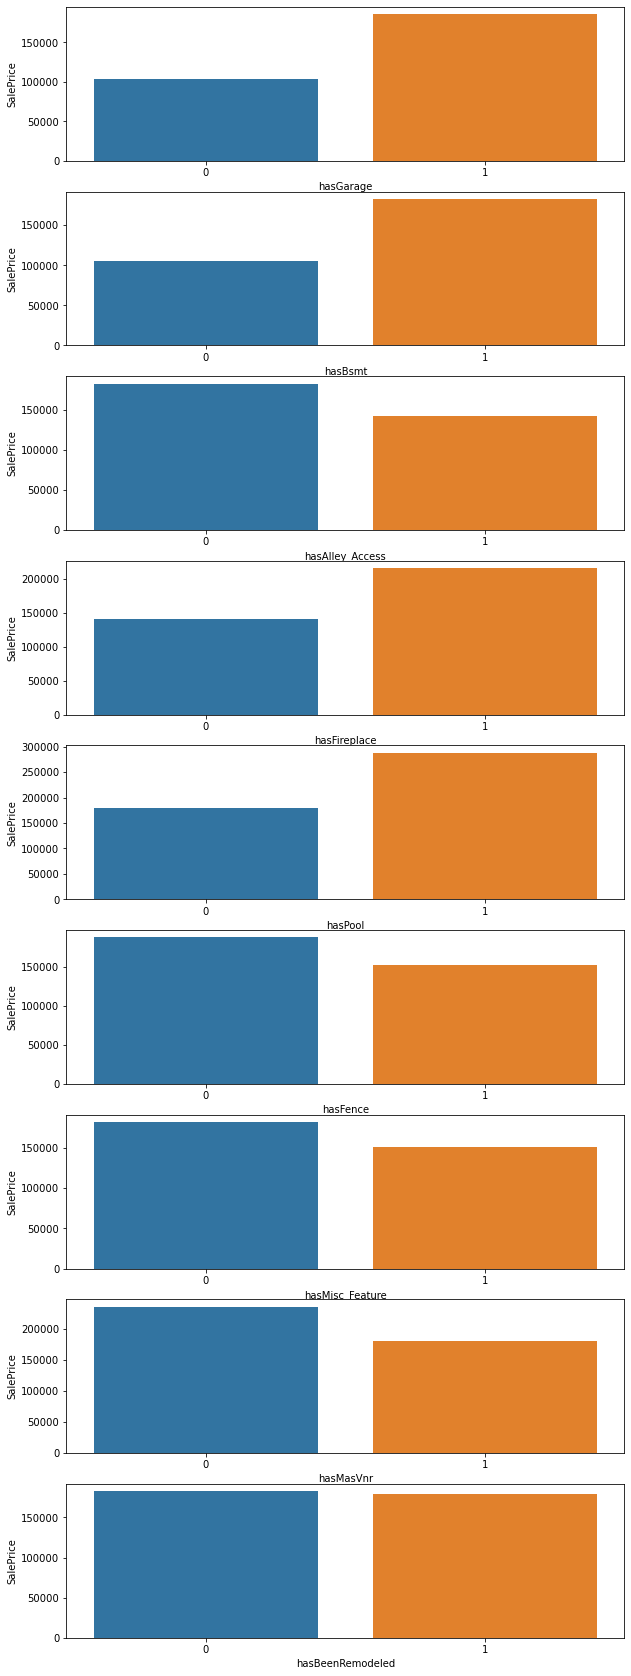

In [8]:
addHasGarage(cleaned.train)
addHasGarage(cleaned.test)

addHasBsmt(cleaned.train)
addHasBsmt(cleaned.test)

addHasAlley_Access(cleaned.train)
addHasAlley_Access(cleaned.test)

addHasFireplace(cleaned.train)
addHasFireplace(cleaned.test)

addHasPool(cleaned.train)
addHasPool(cleaned.test)

addHasFence(cleaned.train)
addHasFence(cleaned.test)

addHasMisc_Feature(cleaned.train)
addHasMisc_Feature(cleaned.test)


addHasMasVnr(cleaned.train)
addHasMasVnr(cleaned.test)


addGrLivAreaHighQualitySF(cleaned.train)
addGrLivAreaHighQualitySF(cleaned.test)


addTotalIndoorSF(cleaned.train)
addTotalIndoorSF(cleaned.test)


addTotalOutdoorSF(cleaned.train)
addTotalOutdoorSF(cleaned.test)

addTotalSF(cleaned.train)
addTotalSF(cleaned.test)


addBsmtBaths(cleaned.train)
addBsmtBaths(cleaned.test)


addBaths(cleaned.train)
addBaths(cleaned.test)


addHasBeenRemodeled(cleaned.train)
addHasBeenRemodeled(cleaned.test)

cleaned.train['NumFloors'] = cleaned.train.apply(getNumFloors, axis=1)
cleaned.test['NumFloors'] = cleaned.test.apply(getNumFloors, axis=1)

plotIndicators(cleaned.train)


# Dropping Columns

In [ ]:
colsToDrop = ['PoolArea','MiscVal','MiscFeature','3SsnPorch','LowQualFinSF','Street',
                                    'Condition2','RoofMatl','Heating','PoolQC','Utilities']
def dropCols(data, colsToDrop):
    return data.drop(colsToDrop, axis=1)


cleaned.train = dropCols(cleaned.train, colsToDrop)
cleaned.test = dropCols(cleaned.test, colsToDrop)


In [ ]:
# for col in trainNumCols:
#     print(col, '-' ,kurtosis(cleaned.train[col], bias = False, fisher=True))
#     if kurtosis(cleaned.train[col], bias = False, fisher=True) > 5:
#         kurtosis(cleaned.train[col], bias = False, fisher=True)

def logTransform(data, colsToTransform):
    for col in colsToTransform:
        if col == 'TotalBsmtSF':
            data[col] = np.log1p(data[col])**5
        elif col == 'SalePrice':
            try:
                data['SalePrice'] = np.log1p(data['SalePrice'])
            except:
                pass
        else:
            data[col] = np.log1p(data[col])
        



In [ ]:
colsToTransform = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF',
                   '1stFlrSF', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'OpenPorchSF', 'EnclosedPorch',
                   '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal','SalePrice']

colsToTransform = np.setdiff1d(colsToTransform, colsToDrop)

logTransform(cleaned.train, colsToTransform)
logTransform(cleaned.test, colsToTransform)

# Dummify Columns

In [9]:
ordCols = cleaned.train.columns[cleaned.train.dtypes == 'object']

In [10]:
# ordCols = ['OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 
#             'KitchenAbvGr','TotRmsAbvGrd', 'Fireplaces', 'GarageCars','MoSold', 'YrSold','ExterQual','ExterCond',
#             'BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1', 'BsmtFinType2','HeatingQC','KitchenQual','FireplaceQu',
#             'PoolQC','Fence','LandSlope','GarageQual', 'GarageCond','GarageFinish']

#ordCols = np.setdiff1d(ordCols, colsToDrop)
cleaned.ordinalEncode(ordCols)




In [ ]:
#trained, tested = cleaned.dummify(ordCols)

In [11]:
#cleaned.train.to_csv('train_filled_na_ord.csv')

In [12]:
#cleaned.test.to_csv('test_filled_na_ord.csv')

In [ ]:
#trained.to_csv('train_filled_na.csv')

In [ ]:
#tested.to_csv('test_filled_na.csv')

# Feature Selection

In [ ]:
allZeroCols = trained.columns[(trained == 0).all()].to_list() + tested.columns[(tested == 0).all()].to_list()
trained = trained.drop(allZeroCols, axis=1)
tested = tested.drop(allZeroCols, axis=1)

X = trained.loc[:, trained.columns != 'SalePrice']
y = trained['SalePrice']

In [ ]:
def get_k_best(k):
    k_best = SelectKBest(f_regression, k=k).fit(X, y)
    X[X.columns[k_best.get_support()]]

    k_best_scores = zip(X.columns, k_best.scores_)
    sorted_coef_importance = sorted(list(k_best_scores),key= lambda x: x[1],reverse=True)
    sorted_coef_importance

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_coef_importance[:k]], [x[1] for x in sorted_coef_importance[:k]])
    plt.xticks(rotation=90)

In [ ]:
get_k_best(50)

# Correlation Matrix

In [ ]:
non_dummy_cols = [col for col in X.columns if 'Dummy' not in col]
f, ax = plt.subplots(figsize=(30, 12))
corr = X[non_dummy_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
upper_tri = corr.where(np.triu(np.ones(corr.shape),k=1).astype(np.bool))
upper_tri

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
mostCorrelatedFeat = get_top_abs_correlations(corr, 500)
mostCorrelatedFeat

In [ ]:
dropped = set()
for pair in mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9]:
    corr1 = X[pair[0]].corr(y)
    corr2 = X[pair[1]].corr(y)
            
    if abs(corr1) > abs(corr2):
        dropped.add(pair[1])
    else:
        dropped.add(pair[0])

        
mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9]

In [ ]:
allVars = set()
for i in range(len(mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9])):
    for j in range(2):
        allVars.add(mostCorrelatedFeat.index[mostCorrelatedFeat > 0.9][i][j])

In [ ]:
allVars

In [ ]:
remaining = allVars - dropped
remaining

In [ ]:
#X = X.loc[:, X.columns.difference(dropped)]
#X = X.drop(['GarageCars','PoolQC','1stFlrSF','ExterQual','YearRemodAdd'], axis=1)

# Model Training

In [ ]:
'''
split_indices = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X, y):
    split_indices.append([train_index, test_index])
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
'''

In [ ]:
scoringOptions = [None, make_scorer(mean_squared_log_error, greater_is_better=False)]
gridScoring = scoringOptions[0]

# Gradient Boosting

In [ ]:
model = GradientBoostingRegressor()
params = {'n_estimators': [100,200,300,500],
          'max_depth':[2,3,4,5],
          'max_features':['sqrt'],
          'subsample':[1,0.9,0.8,0.7,0.6,0.5,0.4,0.3], 
          'loss':['ls']}

gridGbr = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridGbr.fit(X, y)
print(gridGbr.cv_results_)
print(gridGbr.best_params_)
print(gridGbr.best_score_)

In [ ]:
def getFeatureImportance(num, cols, features_importances_, sort):
    
    feature_importances = zip(cols, features_importances_)
    sorted_importance = sorted(list(feature_importances),key= lambda x: abs(x[1]),reverse=False if sort == 'ascending' else True)

    f, ax = plt.subplots(figsize=(13, 9))
    sns.barplot([x[0] for x in sorted_importance[:num]], [x[1] for x in sorted_importance[:num]])
    plt.xticks(rotation=90)
    
    return sorted_importance

In [ ]:
getFeatureImportance(20, X.columns.to_list(), gridGbr.best_estimator_.feature_importances_, sort='descending')

# Evaluating Errors

In [ ]:

# train_indices = split_indices[2][0]
# test_indices = split_indices[2][1]
# train_data = X.iloc[test_indices]
# predictions = grid.predict(train_data)
# actuals = y.iloc[test_indices]


In [ ]:
# split_results = pd.DataFrame(predictions, actuals).reset_index().rename(columns={'SalePrice':'Predictions',0:'Actuals'})
# split_results['AbsDifference'] = abs(split_results['Predictions'] - split_results['Actuals'])
# split_results['Difference'] = split_results['Predictions'] - split_results['Actuals']
# split_results_sorted = split_results.sort_values(by='AbsDifference', ascending=False)
# split_results_sorted



In [ ]:
# train_data = train_data.reset_index()

In [ ]:
# train_data_sorted = train_data.iloc[split_results_sorted.index]

In [ ]:
# larger_errors = train_data_sorted.iloc[:int(len(train_data_sorted)/2)]
# smaller_errors = train_data_sorted.iloc[int(len(train_data_sorted)/2):]

In [ ]:
# larger_errors.mean()[['TotalIndoorSF','OverallQual']]

In [ ]:
# smaller_errors.mean()[['TotalIndoorSF','OverallQual']]

In [ ]:
# split_results_sorted.iloc[:int(len(split_results_sorted)/2)]['Actuals'].mean()

In [ ]:
# split_results_sorted.iloc[int(len(split_results_sorted)/2):]['Actuals'].mean()

In [ ]:
# larger_errors.iloc[0,:60] - train_data_sorted.mean()[:60]

In [ ]:
# split_results_sorted.head(50)

# Ridge Regression

In [ ]:
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(trained.loc[:, trained.columns != 'SalePrice'])
X_Scaled = pd.DataFrame(X_Scaled, columns = trained.columns[trained.columns != 'SalePrice'])

In [ ]:
model = Ridge()
params = {'alpha':[0.1,1,10,50,75,100,1000,2000]}
gridRidge = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridRidge.fit(X_Scaled, y)
print(gridRidge.cv_results_)
print(gridRidge.best_params_)
print(gridRidge.best_score_)

In [ ]:
pvals = stats.coef_pval(gridRidge.best_estimator_, X_Scaled, y)
pvals_sorted = getFeatureImportance(30, X_Scaled.columns, pvals, sort='ascending')
pvals_sorted

In [ ]:
coefMagSorted = getFeatureImportance(30, X_Scaled.columns, gridRidge.best_estimator_.coef_, sort='descending')
coefMagSorted

In [ ]:
#col_subset = [val[0] for val in pvals_sorted if val[1] < 0.05]
col_subset = [val[0] for val in coefMagSorted[:51]]
gridRidge = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridRidge.fit(X_Scaled[col_subset], y)
print(gridRidge.cv_results_)
print(gridRidge.best_params_)
print(gridRidge.best_score_)

In [ ]:
stats.summary(gridRidge.best_estimator_, X_Scaled[col_subset], y)

# Lasso Regression

In [ ]:
model = Lasso()
params = {'alpha':[0.005,0.006,0.0007,0.0008,0.001,0.01,0.1,1,10]}
gridLasso = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridLasso.fit(X_Scaled, y)
print(gridLasso.cv_results_)
print(gridLasso.best_params_)
print(gridLasso.best_score_)

In [ ]:
pvals = stats.coef_pval(gridLasso.best_estimator_, X_Scaled, y)
pvals_sorted = getFeatureImportance(30, X_Scaled.columns, pvals, sort='ascending')
pvals_sorted

In [ ]:
coefMagSorted = getFeatureImportance(30, X_Scaled.columns, gridLasso.best_estimator_.coef_, sort='descending')
coefMagSorted

In [ ]:
stats.summary(gridLasso.best_estimator_, X_Scaled, y)

# SVR

In [ ]:
model = SVR()
params = {'kernel':['linear'],'C':[0.01,0.1],'epsilon':[0.001,0.01,0.1,1]}
gridSVR = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridSVR.fit(X_Scaled, y)
print(gridSVR.cv_results_)
print(gridSVR.best_params_)
print(gridSVR.best_score_)

# Random Forest

In [ ]:
model = RandomForestRegressor()
params = {'n_estimators':[100,500], 'max_features':['auto', 'sqrt']}
gridRf = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridRf.fit(X_Scaled, y)
print(gridRf.cv_results_)
print(gridRf.best_params_)
print(gridRf.best_score_)

# Predictions on Test Set

In [ ]:
tested_scaled = scaler.transform(tested)
tested_scaled = pd.DataFrame(tested_scaled, columns = tested.columns)

gbr_predictions = gridGbr.predict(tested)
ridge_predictions = gridRidge.predict(tested_scaled[col_subset])
lasso_predictions = gridLasso.predict(tested_scaled)
svr_predictions = gridSVR.predict(tested_scaled)

gbr_predictions = pd.Series(np.exp(np.array(gbr_predictions)))
ridge_predictions = pd.Series(np.exp(np.array(ridge_predictions)))
lasso_predictions = pd.Series(np.exp(np.array(lasso_predictions)))
svr_predictions = pd.Series(np.exp(np.array(svr_predictions)))

results = pd.concat([tested.reset_index()['Id'], pd.concat([gbr_predictions, ridge_predictions, lasso_predictions, svr_predictions], axis=1)],axis=1)

final_pred_log_avg = np.exp((np.log(results[0]) + np.log(results[1]) + np.log(results[2]) + np.log(results[3]))/4)
final_pred_log_avg = pd.DataFrame(final_pred_log_avg, columns=['SalePrice'])
final_pred_avg = (results[0] + results[1] + results[2] + results[3])/4
final_pred_avg = pd.DataFrame(final_pred_avg, columns=['SalePrice'])

results = pd.concat([results, final_pred_log_avg],axis=1)

# Stacking Model

In [ ]:
level0 = []
level0.append(('gbr',gridGbr))
level0.append(('ridge',gridRidge))
level0.append(('lasso',gridLasso))
level0.append(('svr',gridSVR))
level1 = Ridge()
model = StackingRegressor(estimators=level0, final_estimator=level1)

In [ ]:
params = {}
gridStacking = GridSearchCV(model, param_grid=params, cv=5, scoring=gridScoring)
gridStacking.fit(X_Scaled, y)
print(gridStacking.cv_results_)
print(gridStacking.best_params_)
print(gridStacking.best_score_)

In [ ]:
stacking_predictions = pd.DataFrame(gridStacking.predict(tested_scaled), columns=['SalePrice'])
results_stacking = pd.concat([tested['Id'], stacking_predictions], axis=1)

# Submission

In [ ]:
#results

In [ ]:
#results[['Id','SalePrice']].to_csv('submission10.csv', index=False)

In [ ]:
results_stacking

In [ ]:
results_stacking[['Id','SalePrice']].to_csv('submission10.csv', index=False)